In [150]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
utils = reload(utils)

In [151]:
Nx,Ny,Nz = 64,1,64
et = 86400.0 * 10.0
N = 10
ig = 4

base_fn = 'output_swe'

def load(Nx,Ny,Nz,et):
    base_fn = 'output_swe'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,Nz,et)

In [168]:
sfx = 'icshear_da_last_working'
sfx = 'icshear_da'
# sfx = 'dvortex_da_rho_rhou_rhow'
# sfx = 'dvortex_da_first_try'
# sfx = 'dvortex_da_flipped_vorty'
sfx = 'dvortex_da'
fn = tc.get_filename(N,sfx)
path = tc.get_path(fn)

# times = np.array([3.0,6.0,10.0])*86400.0
tag = tags[9]
times = np.array([10.0])*86400.0
# times = [1200.0]

# times = [0.0]
# tag = 'ic'

# attributes = ['vorty']
attributes = ['rho', 'rhou', 'rhow', 'vorty', 'rhoY', 'p2_nodes']
a_lbls = ['h', 'hu', 'hw', 'pot. vorticity', 'h$\Theta$', '$\pi$']

attributes = ['rho', 'vorty']
a_lbls = ['h', 'pot. vorticity']

class ens(object):
    def __init__(self):
        None
        
ens = ens()
avg = True
# for time in times:
for aa, attribute in enumerate(attributes):
    data = tc.get_ensemble(times, N, attribute, sfx, avg=True, tag=tag)[0]
    setattr(ens, attribute, data[:,0,:])
print(ens)

from scipy import signal

kernel = np.array([[1.0,1.0],[1.0,1.0]])
kernel /= kernel.sum()

vort_plot = True

if vort_plot == True:
    ll = []
    vorty = ens.vorty
    rho = ens.rho
    print(vorty.shape, rho.shape)
    if avg == False:
        for nn,vv in enumerate(ens.vorty):
            rr = rho[nn]
            vv = vv[:,2,:]
            vv = signal.convolve(vv, kernel, mode='valid')
            vv /= rr[:,2,:]
            vv *= 86400.0*1000
            ll.append(vv)
        ens = np.array(ll)
        
        ens = np.mean(ens,axis=0).T
        ens = [[ens, 'mean']]
    else:
        ens.vorty = signal.convolve(ens.vorty, kernel, mode='valid')
        ens.vorty = ens.vorty / ens.rho
        ens.vorty *= 86400.0 * 1000.0
    # ens = ens[0]

# ensemble plotter
plt_arr = []
for attr in attributes:
    if attr == 'vorty':
        plt_arr.append([getattr(ens,attr).T, attr])
# ens = [[ens[nn][:,2,:].T, nn] for nn in range(ens.shape[0])]
# ens = [[ens[nn].T, nn] for nn in range(ens.shape[0])]
# ens = np.array(ens)

# print(ens[0][0].mean())

# ensemble mean attributes plotter
# ens = [[ens[nn][:,2,:].T, attributes[nn]] for nn in range(ens.shape[0])]
# ens = np.array(ens)

# mean plotter
# ens = [[mem[:,2,:].T,'mean'] for mem in ens]

(65, 65) (64, 64)


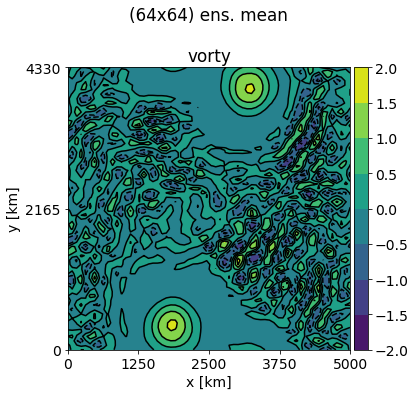

In [169]:
fs = (22,12)
fs = (6,6)
pl = pt.plotter(plt_arr, ncols = 3, figsize=fs)

x_axs = [0,1250,2500,3750,5000]
y_axs = [0,2165,4330]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Nz-1,3)
x_label = r'x [km]'
y_label = r'y [km]'
st = 'SWE shear flow (%ix%i), $\Delta t = 12s$. Potential vorticity in the (x-z) plane.' %(Nx,Nz)
st = '(%ix%i) ens. mean' %(Nx,Nz)


pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(method='contour',aspect='equal', suptitle=st)